# Machine Learning Assignment 1

## Parag Bhatnagar

In [199]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

NUM_PTS = 50
MU = 0
SIGMA = 0.5

W_ORIG = [-10.61, 16.7, -5.607, 0.4345]

def eqn(x, W):
    sum = 0
    for w in xrange(len(W)):
        sum += W[w]*(x**w)
    return sum

pts_x = []
pts_y = []
pts_x_rand = []
pts_y_rand = []

for i in xrange(NUM_PTS):
    pts_x = np.append(pts_x,[i/5.0])
    pts_x_rand = np.append(pts_x_rand, pts_x[i] + np.random.normal(MU, SIGMA))

    pts_y = np.append(pts_y,[eqn(i/5.0, W_ORIG)])
    pts_y_rand = np.append(pts_y_rand, pts_y[i] + np.random.normal(MU, SIGMA))
    

In [200]:
W_SIZE = 4

X = np.empty([NUM_PTS, W_SIZE])
T = np.empty([NUM_PTS,1])
for n in xrange(NUM_PTS):
    for m in xrange(W_SIZE):
        X[n][m] = pts_x_rand[n]**(m)
        T[n] = pts_y_rand[n]

In [201]:
W1 = np.dot((np.dot(np.linalg.inv(np.dot(X.transpose(), X)),X.transpose())),T)
W2 = np.dot(np.linalg.pinv(X),T)

W2

array([[ -5.51568406],
       [ 10.27490289],
       [ -3.8664021 ],
       [  0.30933931]])

In [202]:
pts_x_W1 = []
pts_x_W2 = []

pts_y_W1 = []
pts_y_W2 = []

for i in xrange(NUM_PTS):
    pts_x_W1 = np.append(pts_x_W1, [i/5.0])
    pts_x_W2 = np.append(pts_x_W2, [i/5.0])
    
    pts_y_W1 = np.append(pts_y_W1, [eqn(i/5.0, W1)])
    pts_y_W2 = np.append(pts_y_W2, [eqn(i/5.0, W2)])

## For M=4

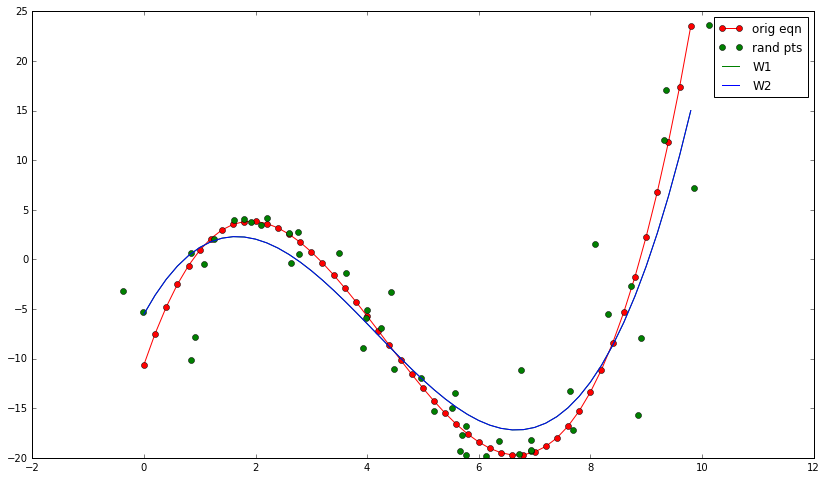

In [203]:
plt.figure(figsize=(14,8))
plt.plot(pts_x, pts_y, marker='o', color='r', label="orig eqn")
plt.plot(pts_x_rand, pts_y_rand, 'go', label="rand pts")
plt.plot(pts_x_W1, pts_y_W1, 'g', label="W1")
plt.plot(pts_x_W2, pts_y_W2, color='b', label="W2")
plt.legend()

plt.show()

In [204]:
error = sum((pts_y_W2 - pts_y_rand)**2)
print "ERROR =", error
print "Estimated Values of W: From W1"
print W1

print "Estimated Values of W: From W2"
print W2

ERROR = 347.241829678
Estimated Values of W: From W1
[[ -5.51568406]
 [ 10.27490289]
 [ -3.8664021 ]
 [  0.30933931]]
Estimated Values of W: From W2
[[ -5.51568406]
 [ 10.27490289]
 [ -3.8664021 ]
 [  0.30933931]]


## For M = 16

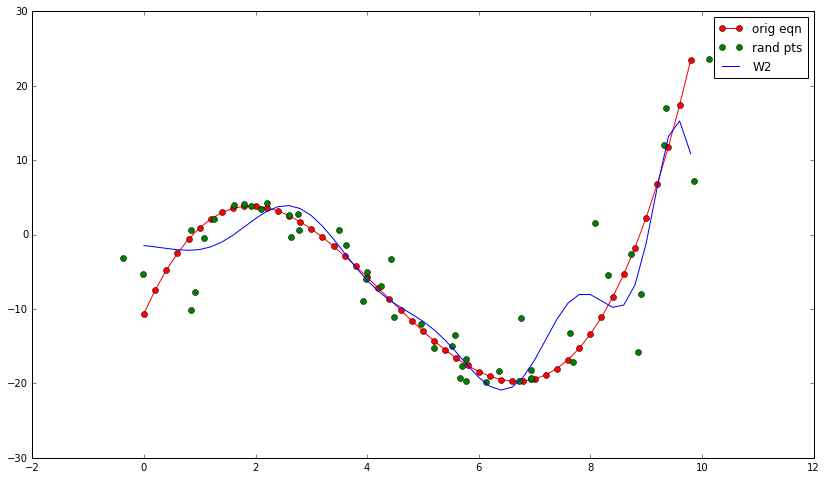

In [228]:
W_SIZE = 16

X = np.empty([NUM_PTS, W_SIZE])
T = np.empty([NUM_PTS,1])
for n in xrange(NUM_PTS):
    for m in xrange(W_SIZE):
        X[n][m] = pts_x_rand[n]**(m)
        T[n] = pts_y_rand[n]

W1 = np.dot((np.dot(np.linalg.inv(np.dot(X.transpose(), X)), X.transpose())), T)
W2 = np.dot(np.linalg.pinv(X), T)

pts_x_W1 = []
pts_x_W2 = []

pts_y_W1 = []
pts_y_W2 = []

for i in xrange(NUM_PTS):
    pts_x_W1 = np.append(pts_x_W1, [i/5.0])
    pts_x_W2 = np.append(pts_x_W2, [i/5.0])
    
    pts_y_W1 = np.append(pts_y_W1, [eqn(i/5.0, W1)])
    pts_y_W2 = np.append(pts_y_W2, [eqn(i/5.0, W2)])
    
plt.figure(figsize=(14,8))
plt.plot(pts_x, pts_y, marker='o', color='r', label="orig eqn")
plt.plot(pts_x_rand, pts_y_rand, 'go', label="rand pts")
# plt.plot(pts_x_W1, pts_y_W1, 'g', label="W1")
plt.plot(pts_x_W2, pts_y_W2, color='b', label="W2")
plt.legend()

plt.show()

In [231]:
error = sum((pts_y_W2 - pts_y_rand)**2)
print "ERROR =", error
print "Estimated Values of W: From W1"
print W1

print "Estimated Values of W: From W2"
print W2

ERROR = 682.279021497
Estimated Values of W: From W1
[[  4.79119093e+03]
 [ -1.99394420e+03]
 [  2.36631147e+02]
 [ -1.17186645e+03]
 [  2.30639851e+03]
 [ -2.00340588e+03]
 [  1.01971169e+03]
 [ -3.38664259e+02]
 [  7.73444973e+01]
 [ -1.24822562e+01]
 [  1.44022587e+00]
 [ -1.18677906e-01]
 [  6.87614883e-03]
 [ -2.69389796e-04]
 [  6.51009630e-06]
 [ -7.45511362e-08]]
Estimated Values of W: From W2
[[ -1.47043290e+00]
 [ -7.94471806e-01]
 [ -4.98807622e-01]
 [  2.19433414e-02]
 [  4.60055552e-01]
 [  5.30086771e-01]
 [ -1.11536705e-02]
 [ -4.45331745e-01]
 [  2.45858135e-01]
 [ -4.89151409e-02]
 [  2.61264594e-04]
 [  1.64528423e-03]
 [ -3.23883089e-04]
 [  2.98275491e-05]
 [ -1.39541998e-06]
 [  2.67447628e-08]]


### Conclusion: Higher Ms display more overfitting

## Adding more noise

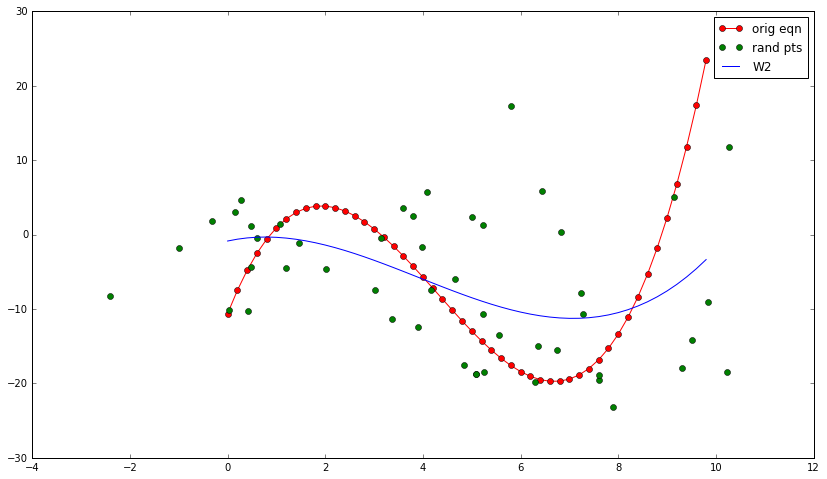

In [235]:
SIGMA = 2

pts_x = []
pts_y = []
pts_x_rand = []
pts_y_rand = []

for i in xrange(NUM_PTS):
    pts_x = np.append(pts_x,[i/5.0])
    pts_x_rand = np.append(pts_x_rand, pts_x[i] + np.random.normal(MU, SIGMA))

    pts_y = np.append(pts_y,[eqn(i/5.0, W_ORIG)])
    pts_y_rand = np.append(pts_y_rand, pts_y[i] + np.random.normal(MU, SIGMA))
    
W_SIZE = 4

X = np.empty([NUM_PTS, W_SIZE])
T = np.empty([NUM_PTS,1])
for n in xrange(NUM_PTS):
    for m in xrange(W_SIZE):
        X[n][m] = pts_x_rand[n]**(m)
        T[n] = pts_y_rand[n]
        
W2 = np.dot(np.linalg.pinv(X),T)

pts_x_W2 = []
pts_y_W2 = []

for i in xrange(NUM_PTS):
    pts_x_W2 = np.append(pts_x_W2, [i/5.0])
    pts_y_W2 = np.append(pts_y_W2, [eqn(i/5.0, W2)])
    
plt.figure(figsize=(14,8))
plt.plot(pts_x, pts_y, marker='o', color='r', label="orig eqn")
plt.plot(pts_x_rand, pts_y_rand, 'go', label="rand pts")
plt.plot(pts_x_W2, pts_y_W2, color='b', label="W2")
plt.legend()

plt.show()

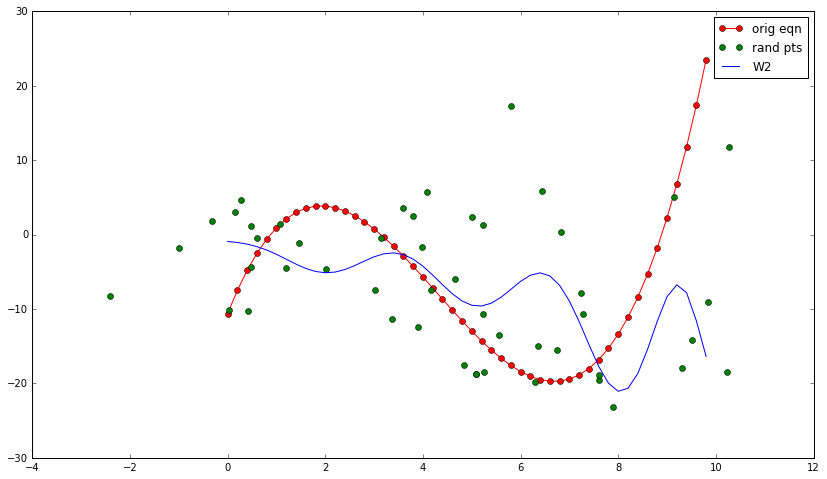

In [236]:
W_SIZE = 16

X = np.empty([NUM_PTS, W_SIZE])
T = np.empty([NUM_PTS,1])
for n in xrange(NUM_PTS):
    for m in xrange(W_SIZE):
        X[n][m] = pts_x_rand[n]**(m)
        T[n] = pts_y_rand[n]

W1 = np.dot((np.dot(np.linalg.inv(np.dot(X.transpose(), X)), X.transpose())), T)
W2 = np.dot(np.linalg.pinv(X), T)

pts_x_W1 = []
pts_x_W2 = []

pts_y_W1 = []
pts_y_W2 = []

for i in xrange(NUM_PTS):
    pts_x_W1 = np.append(pts_x_W1, [i/5.0])
    pts_x_W2 = np.append(pts_x_W2, [i/5.0])
    
    pts_y_W1 = np.append(pts_y_W1, [eqn(i/5.0, W1)])
    pts_y_W2 = np.append(pts_y_W2, [eqn(i/5.0, W2)])
    
plt.figure(figsize=(14,8))
plt.plot(pts_x, pts_y, marker='o', color='r', label="orig eqn")
plt.plot(pts_x_rand, pts_y_rand, 'go', label="rand pts")
# plt.plot(pts_x_W1, pts_y_W1, 'g', label="W1")
plt.plot(pts_x_W2, pts_y_W2, color='b', label="W2")
plt.legend()


## Replacing original function with y= sin(x^2 + 1)

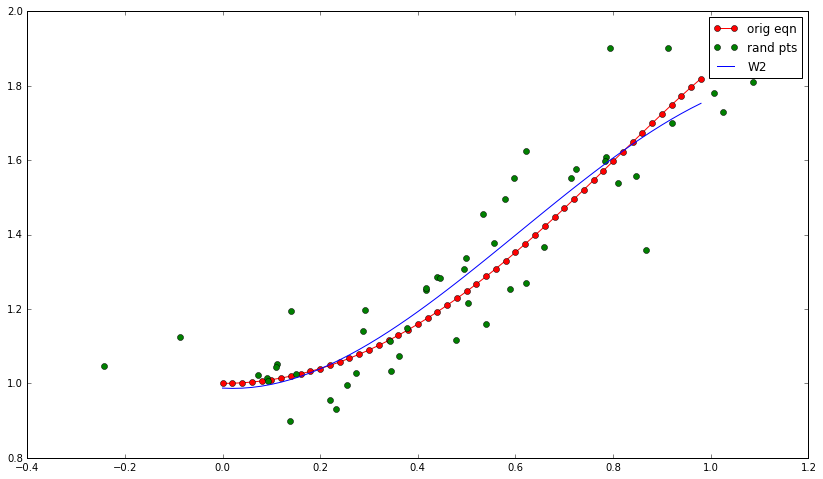

In [246]:
SIGMA = 0.1 # Reset sigma

pts_x = []
pts_y = []
pts_x_rand = []
pts_y_rand = []

for i in xrange(NUM_PTS):
    pts_x = np.append(pts_x,[i/50.0])
    pts_x_rand = np.append(pts_x_rand, pts_x[i] + np.random.normal(MU, SIGMA))

    pts_y = np.append(pts_y,[np.sin((i/50.0)**2)+1])
    pts_y_rand = np.append(pts_y_rand, pts_y[i] + np.random.normal(MU, SIGMA))
    
W_SIZE = 4

X = np.empty([NUM_PTS, W_SIZE])
T = np.empty([NUM_PTS,1])
for n in xrange(NUM_PTS):
    for m in xrange(W_SIZE):
        X[n][m] = pts_x_rand[n]**(m)
        T[n] = pts_y_rand[n]
        
W2 = np.dot(np.linalg.pinv(X),T)

pts_x_W2 = []
pts_y_W2 = []

for i in xrange(NUM_PTS):
    pts_x_W2 = np.append(pts_x_W2, [i/50.0])
    pts_y_W2 = np.append(pts_y_W2, [eqn(i/50.0, W2)])
    
plt.figure(figsize=(14,8))
plt.plot(pts_x, pts_y, marker='o', color='r', label="orig eqn")
plt.plot(pts_x_rand, pts_y_rand, 'go', label="rand pts")
plt.plot(pts_x_W2, pts_y_W2, color='b', label="W2")
plt.legend()

plt.show()

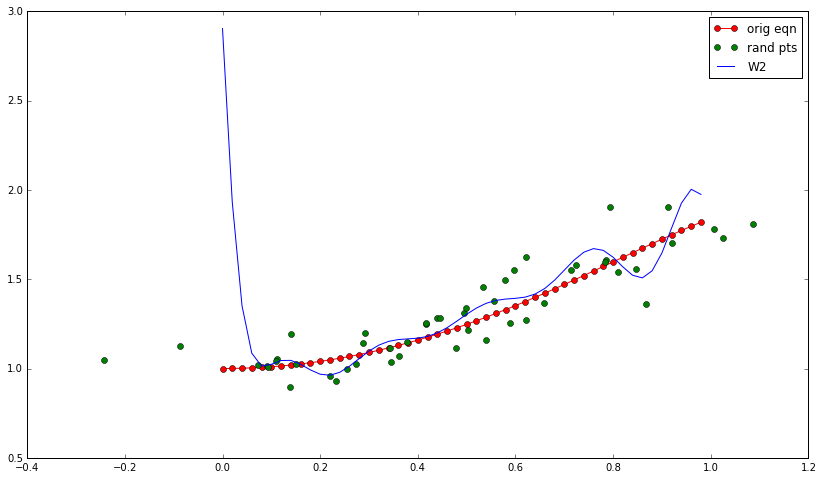

In [248]:
W_SIZE = 16

X = np.empty([NUM_PTS, W_SIZE])
T = np.empty([NUM_PTS,1])
for n in xrange(NUM_PTS):
    for m in xrange(W_SIZE):
        X[n][m] = pts_x_rand[n]**(m)
        T[n] = pts_y_rand[n]

W1 = np.dot((np.dot(np.linalg.inv(np.dot(X.transpose(), X)), X.transpose())), T)
W2 = np.dot(np.linalg.pinv(X), T)

pts_x_W1 = []
pts_x_W2 = []

pts_y_W1 = []
pts_y_W2 = []

for i in xrange(NUM_PTS):
    pts_x_W1 = np.append(pts_x_W1, [i/50.0])
    pts_x_W2 = np.append(pts_x_W2, [i/50.0])
    
    pts_y_W1 = np.append(pts_y_W1, [eqn(i/50.0, W1)])
    pts_y_W2 = np.append(pts_y_W2, [eqn(i/50.0, W2)])
    
plt.figure(figsize=(14,8))
plt.plot(pts_x, pts_y, marker='o', color='r', label="orig eqn")
plt.plot(pts_x_rand, pts_y_rand, 'go', label="rand pts")
# plt.plot(pts_x_W1, pts_y_W1, 'g', label="W1")
plt.plot(pts_x_W2, pts_y_W2, color='b', label="W2")
plt.legend()